In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.patches import Rectangle
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

# UPLOAD FIRST DATASET

In [2]:
data = pd.read_csv("tyres_train.csv", sep = ",")

data.head(5)

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,diameter,add_layers,failure
0,17.990,26,1,0.16,0.01,-8.12,0,1,332.5,8,0,1,5.13,55.0,1,0
1,20.704,36,1,0.30,0.01,-4.52,2,0,328.0,11,1,0,6.15,NaN,1,0
2,19.156,34,1,0.30,0.01,-1.08,0,0,247.0,0,1,0,6.36,NaN,1,0
3,16.802,35,1,0.19,0.02,7.44,1,0,408.0,7,3,1,6.62,54.5,1,0
4,17.140,23,2,0.39,0.01,30.52,0,1,308.0,2,2,0,6.15,76.3,1,0


In [3]:
#dropping all column "diameter"
d="diameter"
data_dropped = data.drop(columns=d)

data_dropped.head(5)

,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,add_layers,failure
0,17.990,26,1,0.16,0.01,-8.12,0,1,332.5,8,0,1,5.13,1,0
1,20.704,36,1,0.30,0.01,-4.52,2,0,328.0,11,1,0,6.15,1,0
2,19.156,34,1,0.30,0.01,-1.08,0,0,247.0,0,1,0,6.36,1,0
3,16.802,35,1,0.19,0.02,7.44,1,0,408.0,7,3,1,6.62,1,0
4,17.140,23,2,0.39,0.01,30.52,0,1,308.0,2,2,0,6.15,1,0


## Categorical Variables

In [4]:
selection_categorical=['tread_type', 'tyre_season','month', 'tread_depth', 'wiring_strength', 'tyre_quality']
data_categorical=data_dropped[selection_categorical]
# without variable "add_layers"

### Create dummies with the OneHotEncoder method

In [5]:
from sklearn.preprocessing import OneHotEncoder
encod = OneHotEncoder(handle_unknown='ignore')

data_dummies=pd.DataFrame()
for i in range(len(selection_categorical)):
    encod.fit(data_dropped[[selection_categorical[i]]].astype(str))
    dummies = encod.transform(data_dropped[[selection_categorical[i]]].astype(str)).toarray()
    for k in range(len(encod.categories_[0])):
        encod.categories_[0][k]=selection_categorical[i]+"_"+str(encod.categories_[0][k])
    data_dummies=pd.concat([data_dummies,pd.DataFrame(dummies,columns=encod.categories_[0])],axis=1)

## Numerical Variables

In [6]:
selection_numerical=['vulc', 'perc_nat_rubber', 'weather', 'perc_imp', 'temperature', 'elevation',
       'perc_exp_comp','failure']
data_numerical=data_dropped[selection_numerical]

# Final dataset

In [7]:
df=pd.concat([data_dummies,data_numerical],axis=1)
df['failure']=data_dropped['failure']

df.tail(5)

,tread_type_0,tread_type_1,tread_type_2,tread_type_3,tread_type_4,tyre_season_0,tyre_season_1,month_0,month_1,month_10,...,tyre_quality_0,tyre_quality_1,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp,failure
2995,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,17.818,29,0.39,0.01,7.28,287.5,5.68,1
2996,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,17.076,30,0.22,0.00,-1.44,152.5,5.81,1
2997,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,16.170,33,0.39,0.01,-3.44,235.0,5.57,0
2998,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,18.872,37,0.03,0.00,-0.76,290.0,5.89,0
2999,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,20.272,33,0.06,0.00,2.80,405.0,6.00,0


# Creation of Train and Test Sets

In [8]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1] #[-1]]

In [9]:
#SPLIT DATA INTO TRAIN AND TEST SET
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, 
                                                    test_size =0.20,
                                                    stratify=y,
                                                    random_state= 42) 

print(X_train1.shape, X_test1.shape)

(2400, 35) (600, 35)


In [10]:
# we have to scale the numerical variables of the train set --> then we apply the same scaler to the numerical variables of the test set
numerical=['vulc','perc_nat_rubber', 'weather', 'perc_imp', 'elevation','temperature', 'perc_exp_comp'] ### attenzione a elevation

independent_variablesA=X_train1[numerical] #no target
independent_variablesB=X_test1[numerical] #no target

scaler_train = StandardScaler().fit(independent_variablesA) 
scaled_train = pd.DataFrame(scaler_train.transform(independent_variablesA))
scaled_train.columns = independent_variablesA.columns

scaled_test = pd.DataFrame(scaler_train.transform(independent_variablesB))
scaled_test.columns = independent_variablesB.columns


In [11]:
import pickle
pickle.dump(scaler_train, open('scaler.pkl', 'wb'))

In [12]:
# subsitute original numerical variables with scaled numerical variables
scaled_train.index= independent_variablesA.index
scaled_test.index= independent_variablesB.index

train_dropped = X_train1.drop(columns=numerical)
test_dropped = X_test1.drop(columns=numerical)

Xtrain2=pd.concat([train_dropped,scaled_train],axis=1)
Xtest2=pd.concat([test_dropped,scaled_test],axis=1)

In [13]:
# create new scaled datasets
df_train=pd.concat([Xtrain2,y_train1],axis=1)
df_test=pd.concat([Xtest2,y_test1], axis=1)

df_test.head(5)

,tread_type_0,tread_type_1,tread_type_2,tread_type_3,tread_type_4,tyre_season_0,tyre_season_1,month_0,month_1,month_10,...,tyre_quality_0,tyre_quality_1,vulc,perc_nat_rubber,weather,perc_imp,elevation,temperature,perc_exp_comp,failure
2448,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,-0.299530,-1.644094,-0.656931,-0.316066,-0.627192,-0.877116,-1.436695,0
982,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,-0.266915,-1.241992,1.828084,2.514375,1.044878,1.782521,1.039006,1
773,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,-0.312074,-1.241992,-0.656931,-0.316066,0.239807,-0.945488,-1.703683,0
901,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-0.818857,0.969568,0.585577,-0.316066,0.044244,0.339890,1.184635,1
399,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,-0.461349,-1.040941,0.585577,-0.316066,-0.529410,0.025383,-0.708548,1


In [14]:
#resample train set
df_majority = df_train[df_train.failure==0]
df_minority = df_train[df_train.failure==1] 
print(df_majority.shape[0],df_minority.shape[0])

df_minority_overs = resample(df_minority, 
                                replace=True,
                                n_samples=1300, # not complete oversampling
                                random_state=42)  

df_overs_train = pd.concat([df_minority_overs, df_majority])

df_overs_train.failure.value_counts()

1594 806


0    1594
1    1300
Name: failure, dtype: int64

In [15]:
from sklearn.utils import shuffle
df_oversampled_train = shuffle(df_overs_train)

In [16]:
#Separate X and y on the new DataFrames
# Dataframes with oversample
X2_train=df_overs_train.iloc[:,0:-1]
y2_train=df_overs_train.iloc[:,-1]

#DataFrames without oversample
X_train=df_train.iloc[:,0:-1]
y_train=df_train.iloc[:,-1]

X_test = df_test.iloc[:,0:-1]
y_test = df_test.iloc[:,-1]

print(X2_train.shape,X_train.shape,X_test.shape)

(2894, 35) (2400, 35) (600, 35)


# Models

## Needed functions

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [18]:
def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X_train)

    print("f1         train %.3f   test %.3f" % (f1_score(y_train, y_pred_train), f1_score(y_test, y_pred)))
    print("precision  train %.3f   test %.3f" % (precision_score(y_train, y_pred_train), precision_score(y_test, y_pred)))
    print("")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [19]:
def hyperp_search_over(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X2_train, y2_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)
    y_pred_train = best_model.predict(X2_train)

    print("f1         train %.3f   test %.3f" % (f1_score(y2_train, y_pred_train), f1_score(y_test, y_pred)))
    print("precision  train %.3f   test %.3f" % (precision_score(y2_train, y_pred_train), precision_score(y_test, y_pred)))
    print("")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [20]:
def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test)

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

## Choice of the best model

In [21]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
parameters = {"C":[1e-4,1e-3,1e-2,1e-1,1,10], "penalty":['l2'], "max_iter":[500,1000,10000] }

In [22]:
hyperp_search(classifier,parameters)

f1_train: 0.562911 using {'C': 0.1, 'max_iter': 500, 'penalty': 'l2'}
f1         train 0.586   test 0.581
precision  train 0.688   test 0.712

[[358  40]
 [103  99]]
              precision    recall  f1-score   support

           0       0.78      0.90      0.83       398
           1       0.71      0.49      0.58       202

    accuracy                           0.76       600
   macro avg       0.74      0.69      0.71       600
weighted avg       0.75      0.76      0.75       600



In [23]:
hyperp_search_over(classifier,parameters)

f1_train: 0.681710 using {'C': 10, 'max_iter': 500, 'penalty': 'l2'}
f1         train 0.690   test 0.667
precision  train 0.706   test 0.619

[[308  90]
 [ 56 146]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       398
           1       0.62      0.72      0.67       202

    accuracy                           0.76       600
   macro avg       0.73      0.75      0.74       600
weighted avg       0.77      0.76      0.76       600



In [24]:
model_Log = LogisticRegression(C=10, max_iter=500,penalty='l2')

In [25]:
model_Log.fit(X_train, y_train)
y_pred_train=model_Log.predict(X_train)
y_pred=model_Log.predict(X_test)

print("f1_train: ", f1_score(y_train, y_pred_train))
print("f1_test: ", f1_score(y_test, y_pred))

f1_train:  0.5890603085553997
f1_test:  0.5919540229885059


In [26]:
pickle.dump(model_Log, open('LogisticRegression_model.pkl', 'wb'))

# TEST

In [27]:
data_test = pd.read_csv("tyres_test.csv", sep = ",")

data_test.head(10)
print(data_test.shape)

(7984, 15)


In [28]:
#dropping 'diameter' 
d = ["diameter"]
data_dropped_test = data_test.drop(columns=d)

print(data_dropped_test.shape)
data_dropped_test.head()

(7984, 14)


,vulc,perc_nat_rubber,wiring_strength,weather,perc_imp,temperature,tread_type,tyre_season,elevation,month,tread_depth,tyre_quality,perc_exp_comp,add_layers
0,17.180,30,1,0.21,0.00,-9.24,0,1,460.5,4,3,0,5.54,1
1,17.744,24,1,0.16,0.01,-9.12,0,1,278.5,8,0,1,5.01,1
2,16.930,34,0,0.27,0.01,3.64,2,0,733.5,11,2,0,6.41,1
3,22.428,34,1,0.03,0.00,0.56,3,0,235.5,9,3,0,5.95,1
4,16.818,29,1,0.06,0.00,-0.96,3,0,461.0,9,0,1,5.97,1


In [30]:
selection_categorical=['tread_type', 'tyre_season','month', 'tread_depth', 'wiring_strength', 'tyre_quality',
       'add_layers']
data_categorical2 = data_dropped_test[selection_categorical]

#drop of add_layers
d = ['add_layers']

data_categorical_dropped = data_categorical2.drop(columns = d)
selection_categorical = ['tread_type', 'tyre_season', 'tread_depth','month', 'wiring_strength', 'tyre_quality']
print(data_categorical_dropped.shape)

(7984, 6)


In [31]:
from sklearn.preprocessing import OneHotEncoder
encod = OneHotEncoder(handle_unknown='ignore')

data_dummies2=pd.DataFrame()
for i in range(len(selection_categorical)):
    encod.fit(data_dropped_test[[selection_categorical[i]]].astype(str))
    dummies = encod.transform(data_dropped_test[[selection_categorical[i]]].astype(str)).toarray()
    for k in range(len(encod.categories_[0])):
        encod.categories_[0][k]=selection_categorical[i]+"_"+str(encod.categories_[0][k])
    data_dummies2=pd.concat([data_dummies2,pd.DataFrame(dummies,columns=encod.categories_[0])],axis=1)

In [32]:
selection_numerical=['vulc', 'perc_nat_rubber', 'weather', 'perc_imp', 'temperature', 'elevation',
       'perc_exp_comp']
data_numerical2 = data_dropped_test[selection_numerical]

In [34]:
#total dataset test
df_test = pd.concat([data_dummies2, data_numerical2],axis=1)

print(df_test.shape)
df_test.head(5)

(7984, 35)


,tread_type_0,tread_type_1,tread_type_2,tread_type_3,tread_type_4,tyre_season_0,tyre_season_1,tread_depth_0,tread_depth_1,tread_depth_2,...,wiring_strength_2,tyre_quality_0,tyre_quality_1,vulc,perc_nat_rubber,weather,perc_imp,temperature,elevation,perc_exp_comp
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,17.180,30,0.21,0.00,-9.24,460.5,5.54
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,17.744,24,0.16,0.01,-9.12,278.5,5.01
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,16.930,34,0.27,0.01,3.64,733.5,6.41
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,22.428,34,0.03,0.00,0.56,235.5,5.95
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,16.818,29,0.06,0.00,-0.96,461.0,5.97


In [37]:
import pickle
import pandas as pd
import numpy as np
import math
from sklearn.metrics import f1_score, classification_report, confusion_matrix

In [35]:
# load scaler and the model
loaded_scaler = pickle.load(open('scaler.pkl', 'rb'))

In [36]:
#scaling of numerical variables with same scaler used in the train

selection_numerical=['vulc', 'perc_nat_rubber', 'weather', 'perc_imp', 'elevation','temperature',
       'perc_exp_comp']
data_numerical2 = df_test[selection_numerical]
scaled_df = pd.DataFrame(loaded_scaler.transform(data_numerical2))
scaled_df.columns = data_numerical2.columns

scaled_df

,vulc,perc_nat_rubber,weather,perc_imp,elevation,temperature,perc_exp_comp
0,-0.628186,-0.236737,-0.386820,-1.023676,0.539671,-1.184787,-0.611462
1,-0.274442,-1.443043,-0.656931,-0.316066,-0.646748,-1.164275,-1.897855
2,-0.784988,0.567466,-0.062688,-0.316066,2.319301,1.016765,1.500166
3,2.663394,0.567466,-1.359218,-1.023676,-0.927056,0.490307,0.383673
4,-0.855235,-0.437788,-1.197151,-1.023676,0.542931,0.230496,0.432216
...,...,...,...,...,...,...,...
7979,1.178169,-0.035687,0.045356,-0.316066,-0.105689,0.462958,0.238044
7980,-0.290749,-2.046196,-0.656931,-0.316066,0.207213,-1.089067,-0.562919
7981,-0.171580,-1.644094,-0.656931,-0.316066,-0.728233,-0.788234,-1.436695
7982,-0.166562,-0.638839,-0.656931,-0.316066,-0.500075,-0.959162,-0.077487


In [38]:
# Feature selection
X2 = pd.concat([data_dummies2, scaled_df], axis = 1)

print(X2.shape)
X2.head()

(7984, 35)


,tread_type_0,tread_type_1,tread_type_2,tread_type_3,tread_type_4,tyre_season_0,tyre_season_1,tread_depth_0,tread_depth_1,tread_depth_2,...,wiring_strength_2,tyre_quality_0,tyre_quality_1,vulc,perc_nat_rubber,weather,perc_imp,elevation,temperature,perc_exp_comp
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,-0.628186,-0.236737,-0.386820,-1.023676,0.539671,-1.184787,-0.611462
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,-0.274442,-1.443043,-0.656931,-0.316066,-0.646748,-1.164275,-1.897855
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,-0.784988,0.567466,-0.062688,-0.316066,2.319301,1.016765,1.500166
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,2.663394,0.567466,-1.359218,-1.023676,-0.927056,0.490307,0.383673
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,-0.855235,-0.437788,-1.197151,-1.023676,0.542931,0.230496,0.432216


In [40]:
loaded_model=pickle.load(open('LogisticRegression_model.pkl', 'rb'))

In [41]:
y_test_predictions = loaded_model.predict(X2)
y_test_predictions.size

7984

(array([6015.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1969.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

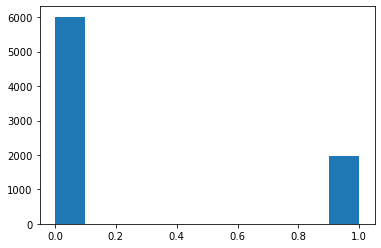

In [42]:
plt.hist(y_test_predictions)

In [ ]:
np.savetxt("Predictions.txt", y_test_predictions, fmt='%d')